In [1]:
import cv2
import scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
from scipy.ndimage.filters import uniform_filter

In [2]:
def get_non_uniform_sampling(source, steps):
    shape = np.shape(source)
    height = shape[0]
    length = shape[1]
    
    x_centre = int(length/2)
    y_centre = int(height/2)
    radius = int(min(length, height)/2)
    
    pi = np.pi
    multiplier = 0.5
    x_coordinates = []
    y_coordinates = []

    for r in steps:
        number_of_points = (1/multiplier) * 2

        for j in range(int(number_of_points)):
            theta = j*pi*multiplier
            x = x_centre + (r * np.cos(theta))
            y = y_centre + (r * np.sin(theta))
            
            if(x<length and x>0 and y<height and y>0):
                x_coordinates.append(int(x))
                y_coordinates.append(int(y))

        multiplier = multiplier/2
    
    return x_coordinates, y_coordinates


def window_stdev(X, window_size):
    c1 = uniform_filter(X, window_size, mode='reflect')
    c2 = uniform_filter(X*X, window_size, mode='reflect')
    return np.sqrt(c2 - c1*c1)

In [1]:
img = cv2.imread("image081.png")
print(np.shape(img))
(B,G,R) = cv2.split(img)
cv2.imshow("Source Image", B)
cv2.waitKey(0)

NameError: name 'cv2' is not defined

In [6]:
steps = [40, 150, 275, 450, 590, 720]
x_coordinates, y_coordinates = get_non_uniform_sampling(G, steps)
number_of_points = (np.shape(x_coordinates))[0]
print("The number of points is", number_of_points)

The number of points is 188


Text(0.5, 1.0, 'Image and Sampling Points')

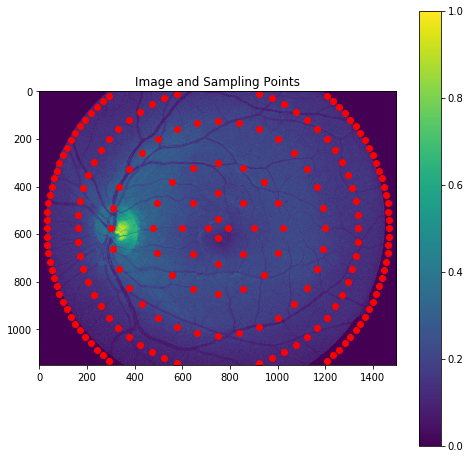

In [7]:
plt.figure(figsize = (8,8))
plt.imshow(G)
plt.scatter(x_coordinates, y_coordinates, color='red')
plt.colorbar()
plt.title("Image and Sampling Points")

In [25]:
def get_roi_values(src, x , y, window_size):
    
    height = np.shape(img)[0]
    length = np.shape(img)[1]
    
    left = x - int(window_size/2)
    left = max(0, left)
    
    right = x + int(window_size/2)
    right = min(length, right)
    
    top = y - int(window_size/2)
    top = max(0, top)
    
    bottom = y + int(window_size/2)
    bottom = min(height, bottom)
    
    slice_arr = src[top:bottom, left:right]
    
    return slice_arr, np.mean(slice_arr), np.std(slice_arr)

def get_mean_std(src, x_coordinates, y_coordinates, window_size):
    mean = []
    std = []
    number_of_points = np.shape(x_coordinates)[0]
    
    for i in range(number_of_points):
        slice_arr, slice_mean, slice_std = get_roi_values(src, x_coordinates[i], y_coordinates[i], window_size)
        mean.append(slice_mean)
        std.append(slice_std)
    
    return mean, std

In [9]:
mean, std = get_mean_std(G, x_coordinates, y_coordinates, 50)

765
725
685
725
875
831
725
618
575
618
725
831
1000
979
919
830
725
619
530
470
450
470
530
619
725
830
919
979
1175
1166
1140
1099
1043
975
897
812
725
637
552
474
406
350
309
283
275
283
309
350
406
474
552
637
724
812
897
975
1043
1099
1140
1166
1315
1312
1303
1289
1270
1245
1215
1181
1142
1099
1052
1003
950
896
553
499
446
397
350
307
268
234
204
179
160
146
137
135
137
146
160
179
204
234
268
307
350
397
446
499
553
896
950
1003
1052
1099
1142
1181
1215
1245
1270
1289
1303
1312
1445
1444
1441
1437
1431
1423
1413
1402
1390
1375
1359
1342
1323
1303
1281
1258
1234
1208
1181
268
241
215
191
168
146
126
107
90
74
59
47
36
26
18
12
8
5
5
5
8
12
18
26
36
47
59
74
90
107
126
146
168
191
215
241
268
1181
1208
1234
1258
1281
1303
1323
1342
1359
1375
1390
1402
1413
1423
1431
1437
1441
1444


In [10]:
# image_window_size = 50
# G_mean = cv2.blur(G, (image_window_size, image_window_size))
# G_mean = np.array(G_mean, dtype=np.float32)

# plt.figure(figsize = (8,8))
# plt.imshow(G_mean)
# plt.colorbar()
# plt.title("Mean of Image")

In [11]:
# G_std = window_stdev(G, image_window_size)
# G_std = np.array(G_std, dtype=np.float32)

# plt.figure(figsize = (8,8))
# plt.imshow(G_std)
# plt.colorbar()
# plt.title("Standard Deviation of Image")

In [12]:
# mean = np.empty(number_of_points)
# std = np.empty(number_of_points)

# for i in range(number_of_points):
#     x = x_coordinates[i]
#     y = y_coordinates[i]
    
#     mean[i] = G_mean[y, x]
#     std[i] = G_std[y, x]

In [13]:
xi = np.arange(0, np.shape(G)[1], 1)
yi = np.arange(0, np.shape(G)[0], 1)
x_grid, y_grid = np.meshgrid(xi, yi)

points = []
for i , j in zip(x_coordinates, y_coordinates):
    points.append([i,j])

Text(0.5, 1.0, 'Interpolated Mean')

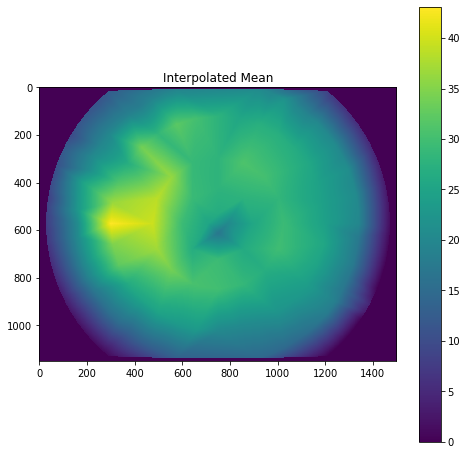

In [14]:
interpolated_mean = scipy.interpolate.griddata(points, mean, (x_grid, y_grid) , method='linear', fill_value=0, rescale=False)

plt.figure(figsize = (8,8))
plt.imshow(interpolated_mean)
plt.colorbar()
plt.title("Interpolated Mean")

Text(0.5, 1.0, 'Interpolated Standard Deviation')

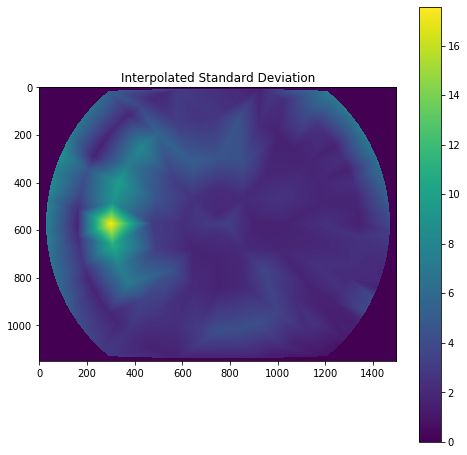

In [15]:
interpolated_std = scipy.interpolate.griddata(points, std, (x_grid, y_grid) , method='linear', fill_value=0, rescale=False)

plt.figure(figsize = (8,8))
plt.imshow(interpolated_std)
plt.colorbar()
plt.title("Interpolated Standard Deviation")

C:\Users\Shalaka-Deshpande\Anacondapython\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Shalaka-Deshpande\Anacondapython\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


Text(0.5, 1.0, 'Mahalanobis Distance')

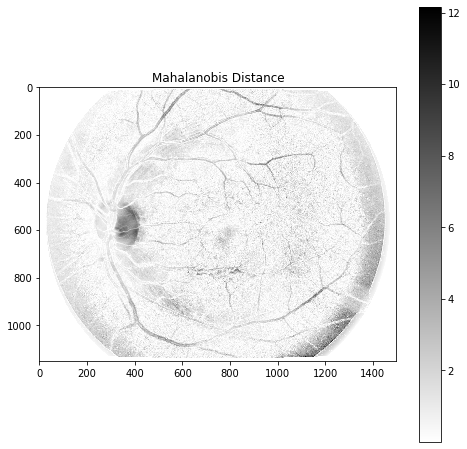

In [16]:
height = np.shape(G)[0]
length = np.shape(G)[1]

mahalanobis = np.empty(np.shape(G))
background = np.zeros(np.shape(G))

G = np.array(G)
interpolated_mean = np.array(interpolated_mean)
interpolated_std = np.array(interpolated_std)

mahalanobis = np.abs((G - interpolated_mean)/interpolated_std)
plt.figure(figsize = (8,8))
plt.imshow(mahalanobis, cmap='binary')
plt.colorbar()
plt.title("Mahalanobis Distance")

In [17]:
for i in range(height):
    for j in range(length):
        if(mahalanobis[i, j] <= 1):
            background[i, j] = 1

Text(0.5, 1.0, 'Background')

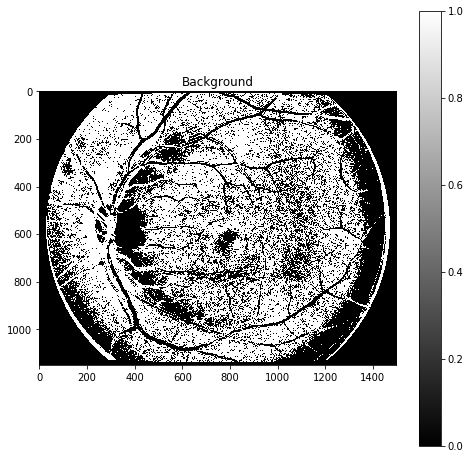

In [18]:
plt.figure(figsize = (8,8))
plt.imshow(background, cmap="binary_r")
plt.colorbar()
plt.title("Background")

Text(0.5, 1.0, 'Mult')

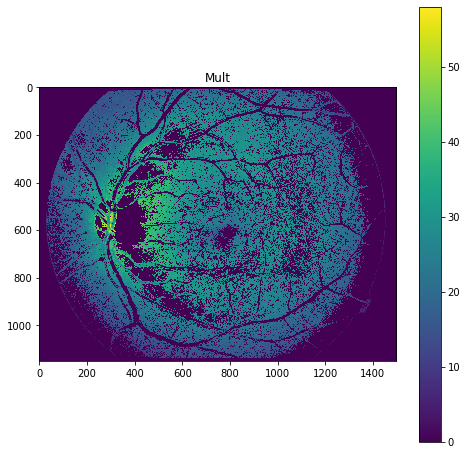

In [19]:
background = np.array(background)
G = np.array(G)
mult = background*G

plt.figure(figsize = (8,8))
plt.imshow(mult)
plt.colorbar()
plt.title("Mult")

In [20]:
background_window_size = 125

In [21]:
x_white = np.where(background==1)[1]
y_white = np.where(background==1)[0]

print(np.shape(x_white)[0])

887042


In [22]:
# background_window_size = 125
# SA = cv2.blur(background, (background_window_size, background_window_size))
# SM = window_stdev(background, background_window_size)

In [23]:
x_all = np.arange(0, length , 1)
y_all = np.arange(0, height , 1)

print(x_all)
print(y_all)

[   0    1    2 ... 1497 1498 1499]
[   0    1    2 ... 1149 1150 1151]


In [26]:
mean_mult = []
std_mult = []
number_of_points = np.shape(x_all)[0]
number_of_points_y = np.shape(y_all)[0]
window_size = 125
  
for i in range(number_of_points):
    for j in range(number_of_points_y):
        mult_slice, temp_mean, temp_std = get_roi_values(mult, x_all[i] , y_all[j], window_size)
        mult_slice = mult_slice[mult_slice != 0]
        mean_m = np.mean(mult_slice)
        std_m = np.std(mult_slice)
        mean_mult.append(mean_m)
        std_mult.append(std_m)

In [ ]:
# mean_mult = []
# std_mult = []
# number_of_points = np.shape(x_white)[0]
# window_size = 125
  
# for i in range(number_of_points):
#     mult_slice, temp_mean, temp_std = get_roi_values(mult, x_white[i] , y_white[i], window_size)
#     mult_slice = mult_slice[mult_slice != 0]
#     mean_m = np.mean(mult_slice)
#     std_m = np.std(mult_slice)
#     mean_mult.append(mean_m)
#     std_mult.append(std_m)

In [ ]:
# points_bg = []
# for i, j in zip(x_white, y_white):
#     points_bg.append([i,j])

In [ ]:
# interpolated_meanmult = scipy.interpolate.griddata(points_bg, mean_mult, (x_grid, y_grid) , method='linear', 
#                                                    fill_value=0, rescale=False)

# plt.figure(figsize = (8,8))
# plt.imshow(interpolated_meanmult, cmap='jet')
# plt.colorbar()

In [ ]:
# interpolated_stdmult = scipy.interpolate.griddata(points_bg, std_mult, (x_grid, y_grid) , method='linear', 
#                                                   fill_value=0, rescale=False)

# plt.figure(figsize = (8,8))
# plt.imshow(interpolated_stdmult, cmap='jet')
# plt.colorbar()

In [31]:
U = np.empty(np.shape(G))
# G = np.array(G)
SM = np.array(mean_mult)
SA = np.array(std_mult)
SM = SM.reshape(1152,1500)
SA = SA.reshape(1152,1500)
U = (G - SM) / SA

C:\Users\Shalaka-Deshpande\Anacondapython\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys
C:\Users\Shalaka-Deshpande\Anacondapython\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys


Text(0.5, 1.0, 'B plane')

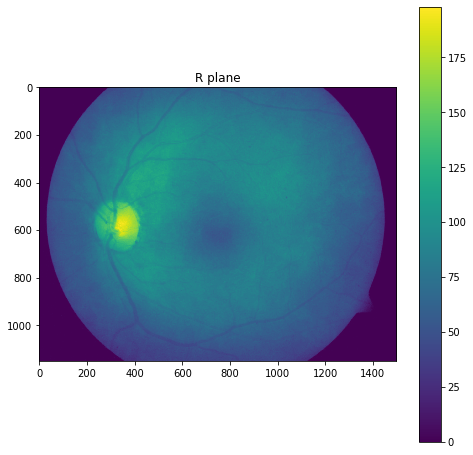

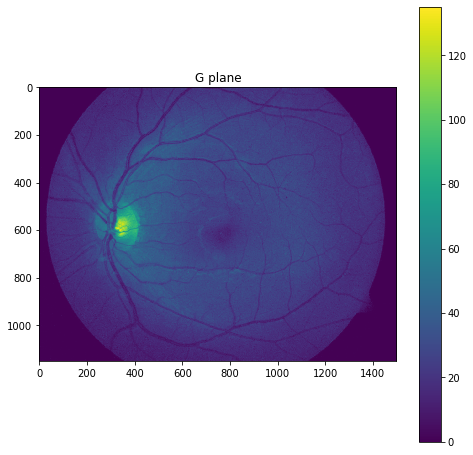

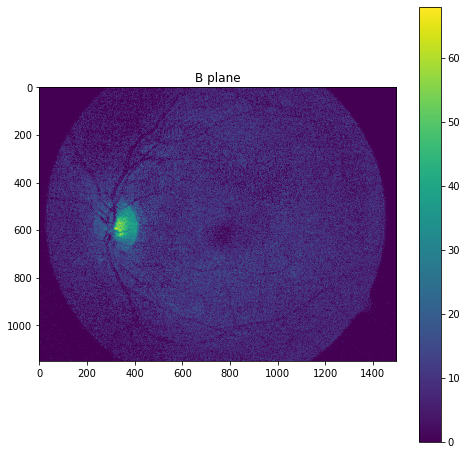

In [32]:
plt.figure(figsize = (8,8))
plt.imshow(R)
plt.colorbar()
plt.title("R plane")

plt.figure(figsize = (8,8))
plt.imshow(G)
plt.colorbar()
plt.title("G plane")

plt.figure(figsize = (8,8))
plt.imshow(B)
plt.colorbar()
plt.title("B plane")

C:\Users\Shalaka-Deshpande\Anacondapython\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys
C:\Users\Shalaka-Deshpande\Anacondapython\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in multiply
  import sys
C:\Users\Shalaka-Deshpande\Anacondapython\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in true_divide
  
C:\Users\Shalaka-Deshpande\Anacondapython\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in multiply
  
C:\Users\Shalaka-Deshpande\Anacondapython\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':
C:\Users\Shalaka-Deshpande\Anacondapython\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in multiply
  if __name__ == '__main__':


Text(0.5, 1.0, 'Corrected B plane')

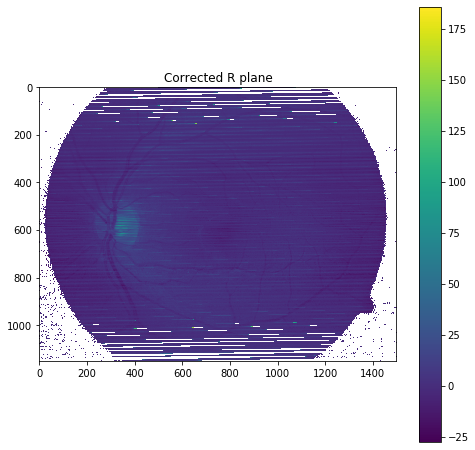

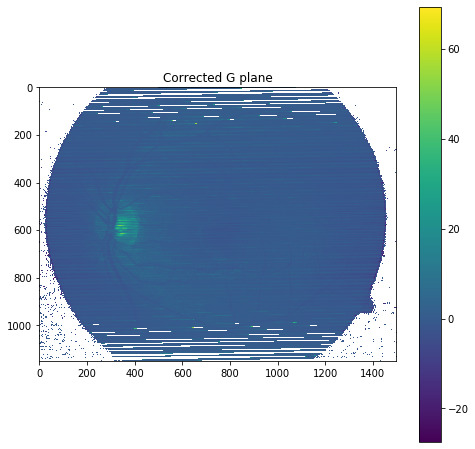

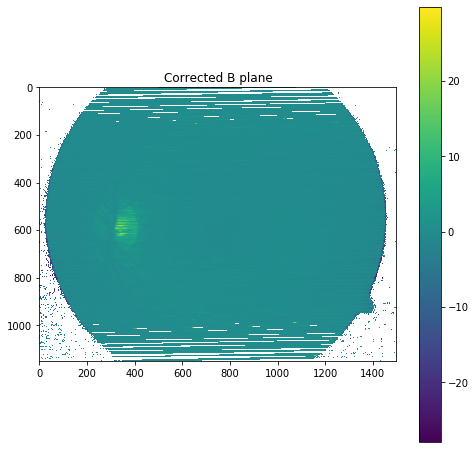

In [33]:
v = np.empty(np.shape(G))
R = np.array(R)
G = np.array(G)
B = np.array(B)

v = np.maximum(np.maximum(R,G),B)
R_corr = (U/v)*R
G_corr = (U/v)*G
B_corr = (U/v)*B

plt.figure(figsize = (8,8))
plt.imshow(R_corr)
plt.colorbar()
plt.title("Corrected R plane")

plt.figure(figsize = (8,8))
plt.imshow(G_corr)
plt.colorbar()
plt.title("Corrected G plane")

plt.figure(figsize = (8,8))
plt.imshow(B_corr)
plt.colorbar()
plt.title("Corrected B plane")

In [34]:
Final_image = cv2.merge([R_corr, G_corr, B_corr])

In [35]:
cv2.namedWindow('Enhanced Image', cv2.WINDOW_NORMAL)
cv2.imshow("Enhanced Image", Final_image)
cv2.waitKey(0)

-1